In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../src')

# AT3 - Data Product with Machine Learning

## 3. Modeling

**[3.1]** Import the pandas and numpy package

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)

**[3.2]** Load the Merge dataset into a dataframe called df

In [5]:
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_test = pd.read_parquet('../data/processed/X_test.parquet')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

### Baseline Model

**[3.3]** Import the NullRegressor class

In [30]:
from models.predict_model import NullRegressor

**[3.4]** Instantiate a NullRegressor and save it into a variable called base_model

In [31]:
base_model = NullRegressor()

**[3.5]** Make a prediction using fit_predict() and save the results in a variable called y_base

In [32]:
y_base = base_model.fit_predict(y_test)

**[3.6]** Import the function print_regressor_scores and display the RMSE and MAE scores of this baseline model on the testing set

In [33]:
from models.predict_model import print_regressor_scores

In [34]:
print_regressor_scores(y_preds=y_base, y_actuals=y_test, set_name='Testing')

RMSE Testing: 207.32320582921383
MAE Testing: 154.8408774410935


### Linear Regression Model

**[3.7]** Train Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

**[3.8]** Instantiate the `LinearRegression` class

In [8]:
lr = LinearRegression()

**[3.9]** Fit the model and display its performance on the training and validation sets

In [24]:
from models.predict_model import fit_assess_regressor

In [25]:
lr = fit_assess_regressor(lr, X_train, y_train, X_test, y_test)

RMSE Training: 203.53298697974867
MAE Training: 150.6178202928602
RMSE Testing: 203.27936723411852
MAE Testing: 150.54948793232722


**[4.0]** Display the permutations importance of all features

In [18]:
from models.predict_model import permutation_importance

/Users/narongvatchingpayakmon/Projects/Spring2023/adv_mla_2023/at3_group_9/notebooks/../src/models/predict_model.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='feature', y='importance', palette='ch:.25')
/Users/narongvatchingpayakmon/Projects/Spring2023/adv_mla_2023/at3_group_9/notebooks/../src/models/predict_model.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='feature', y='importance', palette='ch:.25')


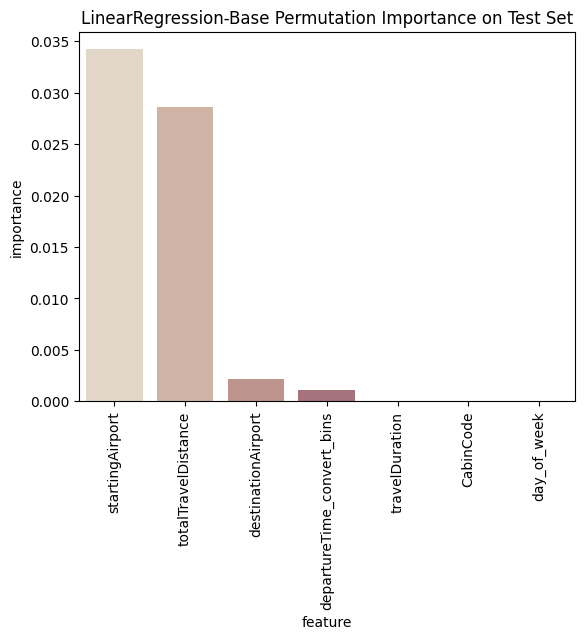

,feature,importance
0,startingAirport,0.034218
1,totalTravelDistance,0.028569
2,destinationAirport,0.002185
3,departureTime_convert_bins,0.001059
4,travelDuration,0.000080
5,CabinCode,0.000047
6,day_of_week,0.000009


In [19]:
permutation_importance(lr, X_test, y_test, 'Test', 'LinearRegression-Base')